# BoomBikes Bike Sharing Aassignment

# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge proits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the America
 market. The company wants

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
 
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## To achieve our business goal, we followed these steps to build a linear regression model.

### Data Preparation:
- Import necessary libraries
- Data Exploration and visualization
- Feature engineering (dummy variable)

### Split the data:
- Divide the dataset into training and testing sets
- Rescaling the features

### Model training:
- Create a linear regression model
- Fit the model

### Model evaluation:
- Make predictions
- Evaluate performance (R-squared)

### Model interpretation:
- Analyze coefficients 

# Data Preparation

#### Import required libraries

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

#import linear regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler




In [8]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# checking the shape of dataframe
df.shape

(730, 16)

In [10]:
# get the info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
# describing the columns of dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
df.value_counts().sum()

730

##### In order to keep the dataset safe, let's create a duplicvate copy of the original dataset and name the dataframe to df_dup. All further actions willbe performed on the duplicate dataset. 

In [15]:
#copy of the original dataset
df_dup = df.copy()
df_dup.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
# Validating the if  the dataset is copied properly.
df_dup.shape

(730, 16)

In [17]:
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [18]:
df_dup.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [19]:
df_dup.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Let's try to drop the duplicate values from the original dataset.

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(730, 16)

#### As the shape of the dataset is same as earlier even after dropping the duplicate values, this means there was no duplicate entry. 

#### As mentioned in the assignment summary there are few columns that would not be required for the study and making  the model.
##### - Dropping unwanted columns
##### - column name 'instant' has only serial number as the data.
##### - dteday has date which can be compensated by year and month column.
##### - casual and registered seems to be the breakup by category for cnt column.
##### - dropping - instant, dteday, casual and registered.

In [26]:
df=df_dup.copy()

In [27]:
df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

In [28]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
df.shape

(730, 12)

#### Encoding the columns names to a more meaningfull and ease of readability 

In [31]:
# Encoding/mapping the season column to a more meaningful names.
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter' })


In [32]:
# Encoding/mapping the weekday column to a more meaningful names.
df.weekday = df.weekday.map({0:'sun',1:'mon', 2:'tues', 3:'wed', 4:'thurs', 5:'fri', 6:'sat'})

In [33]:
# Encoding/mapping the mnth column to a more meaningful names.
df.mnth = df.mnth.map({1:'jan',  2:'feb',  3:'mar',  4:'apr',  5:'may',  6:'jun',  7:'jul',  8:'aug',  9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [34]:
# Encoding/mapping the weathersit column to a more meaningful names.
df.weathersit = df.weathersit.map({1: 'Clear', 2: 'Misty',  3: 'Light_SnowRain_Thunderstorm', 4: 'Heavy_RainSnow'})

In [35]:
# check how the dataset look like after encoding the columns
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [36]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## 
##  Data Exploration and visualization
## 

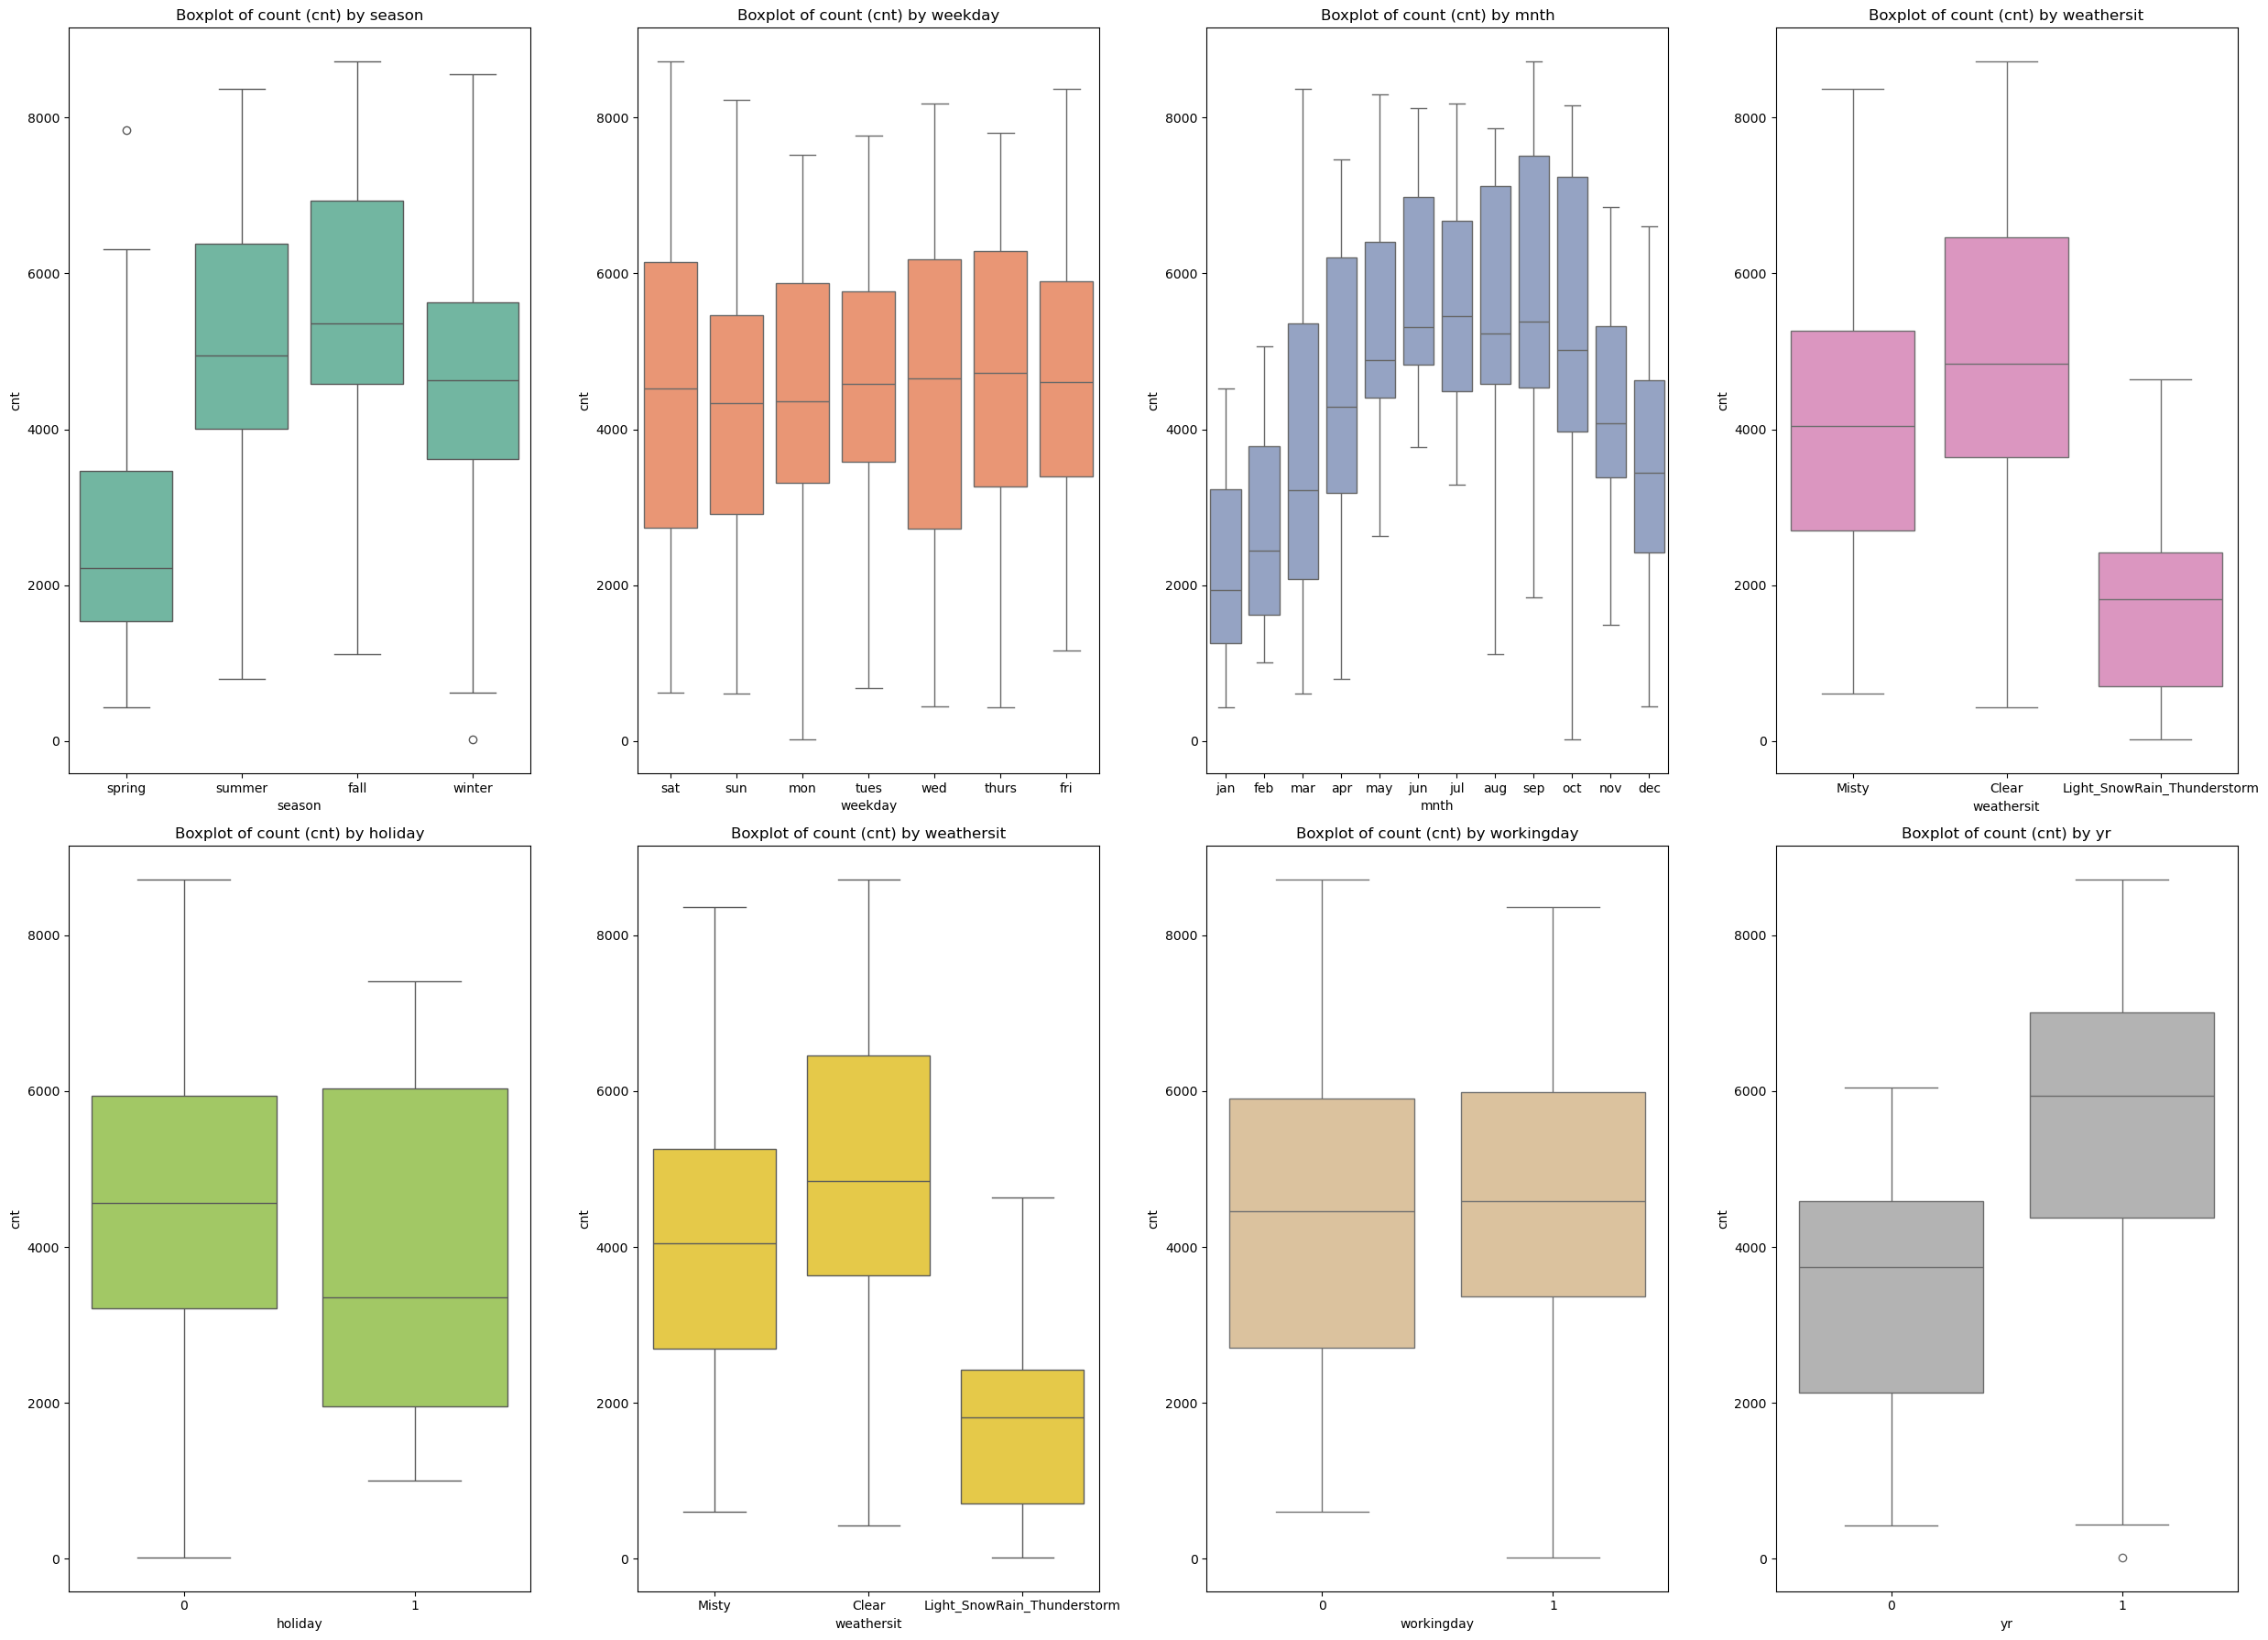

In [286]:
# Set Seaborn palette
sns.set_palette('Set2')

# Define variables for subplots
categories = ['season', 'weekday', 'mnth', 'weathersit', 'holiday', 'weathersit', 'workingday', 'yr']
colors = sns.color_palette('Set2', len(categories)) 

# Create the plot
plt.figure(figsize=(25, 18))

for i, (category, color) in enumerate(zip(categories, colors), start=1):
    plt.subplot(2, 4, i)  # Arrange subplots in 2 rows and 4 columns
    sns.boxplot(x=df[category], y=df['cnt'], color=color)  
    plt.title(f'Boxplot of count (cnt) by {category}') 
plt.tight_layout()  
plt.show()


In [39]:
# function to create barplot related to categorical columns


In [40]:
def plot_cat_columns(column, hue='yr'):
    """
    Function to create barplots for a categorical column vs. 'cnt'.
    
    Parameters:
    - column (str): The categorical column to plot.
    - hue (str): Optional column for color grouping in the second plot.
    """
    plt.figure(figsize=(12, 6))
    
    # Plot 1: Without hue
    plt.subplot(1, 2, 1)
    sns.barplot(x=df[column], y=df['cnt'], ci=90)  # Capturing error bars for showing the confidence level , assuming 90% of confidence level (confidence intervals, ci=90)
    plt.title(f"Barplot of 'cnt' by {column}")
    
    # Plot 2: With hue (if provided)
    plt.subplot(1, 2, 2)
    sns.barplot(x=df[column], y=df['cnt'], hue=df[hue] if hue else None, ci=90, palette='Set1')
  
    if hue:
        plt.legend(title=hue)
    plt.title(f"Barplot of 'cnt' by {column} with {hue if hue else 'no hue'}")
    
    plt.tight_layout()  # Adjust subplot spacing
    plt.show()



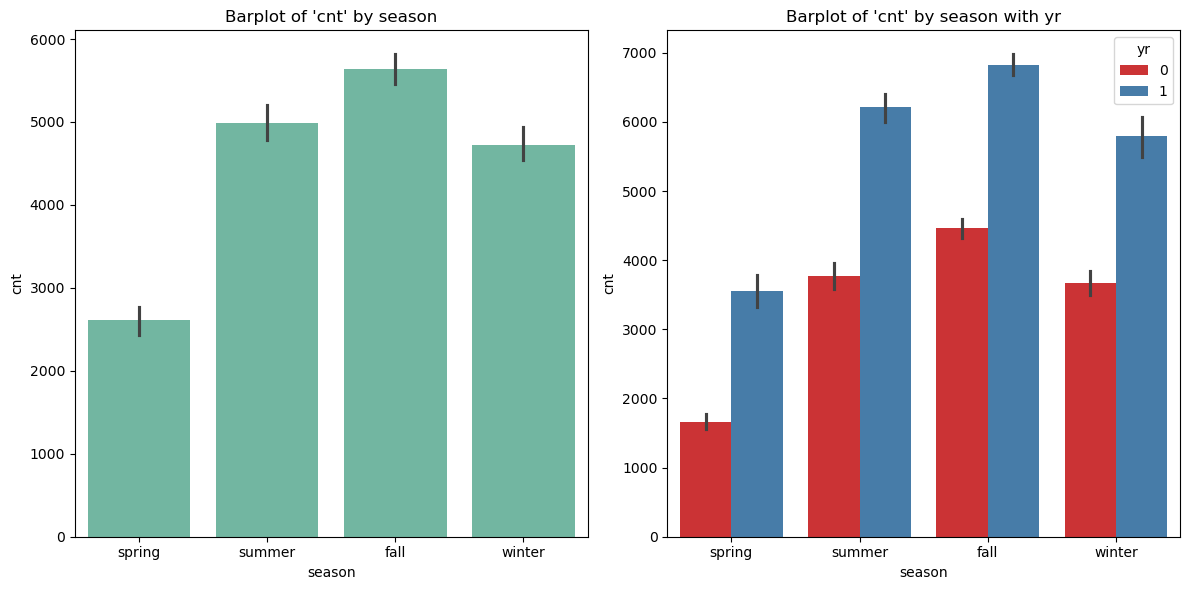

In [41]:
# ploting the visualization data for season with and without yr wise comparison
plot_cat_columns('season', hue='yr')


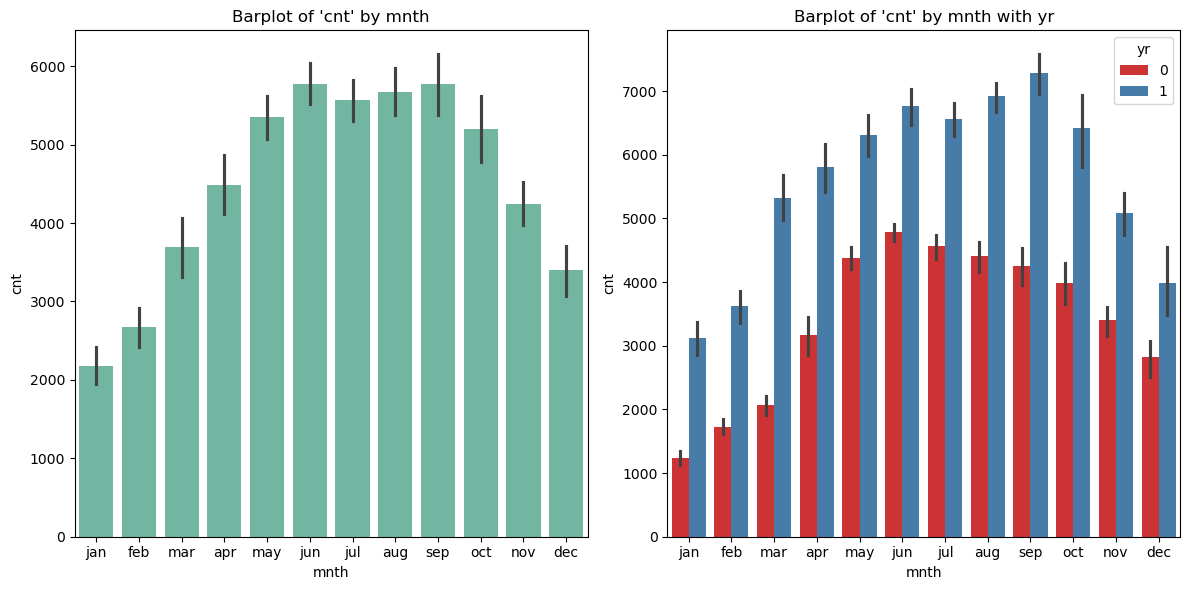

In [43]:
# plotting visualization for month column

plot_cat_columns('mnth', hue='yr')

#### Observation: 

The plots above shows the relationship between categorical variables and a target variable.

- The boxplot for year shows that bike rentals are more in the year 2019 compared to 2018
- Bike Rentals are more in may, june, july, aug, sep and oct. Trend increased till mid of the year, then reached its threshold in may to oct.
- It started decreasing as we approached the end of year.
- Clear weather attracted more booking 

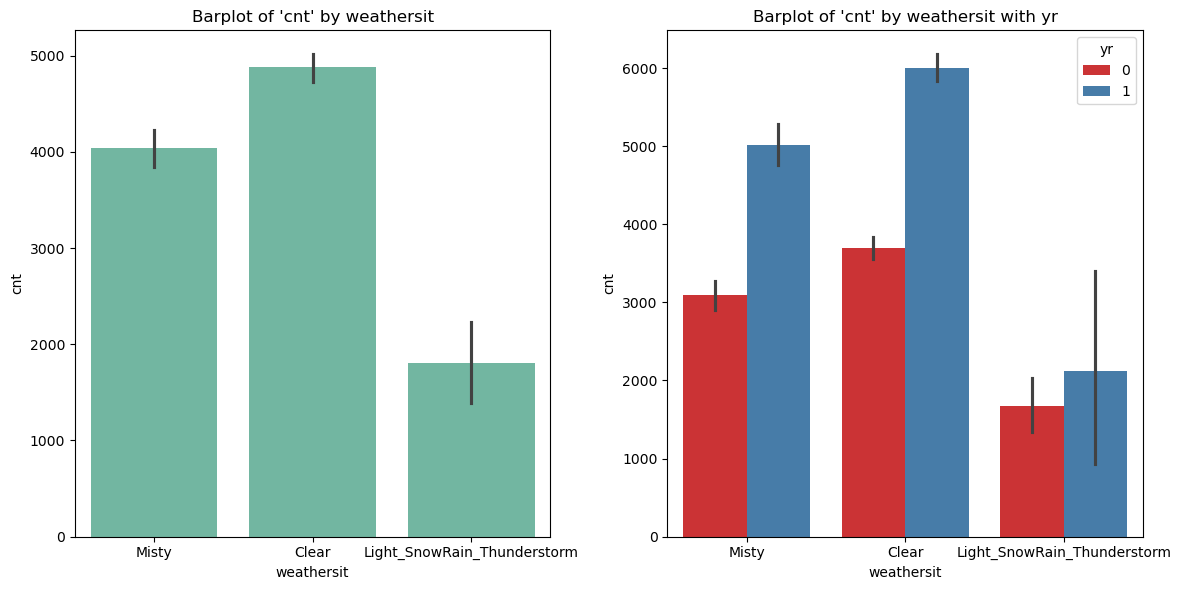

In [45]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit', hue='yr')

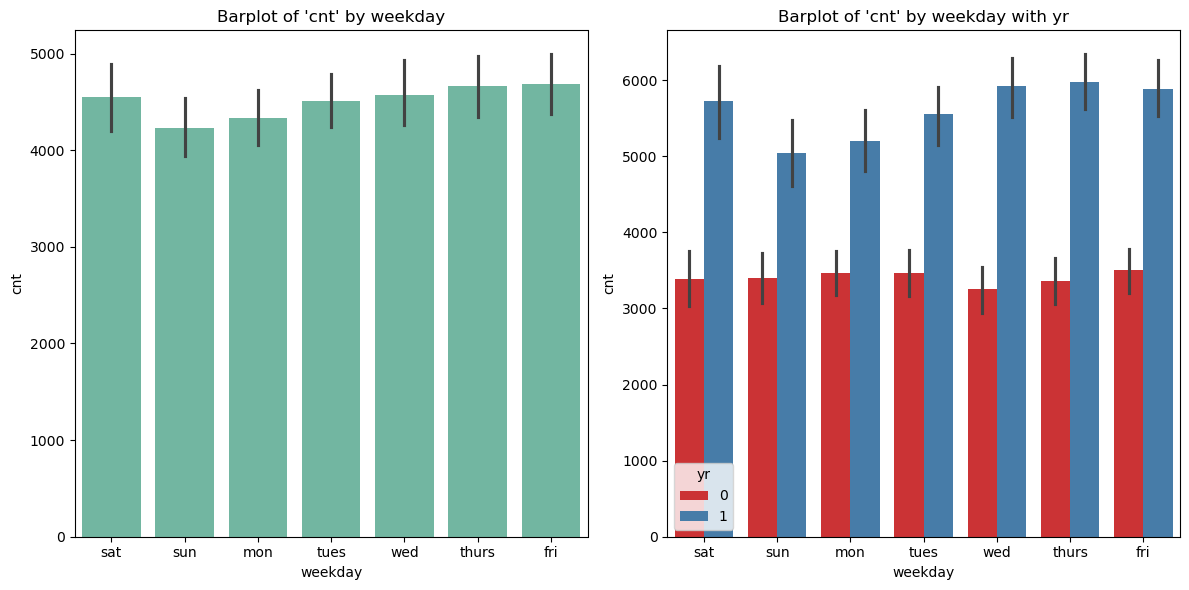

In [47]:
# plotting visualization for weekday column

plot_cat_columns('weekday', hue='yr')

##### Thurs, Fri and Sat have more number of bookings as compared to the start of the week.
##### The bike demand increased significantly in 2019 but had followed the same trend as was in 2018, the most used days were Wed to Sat.

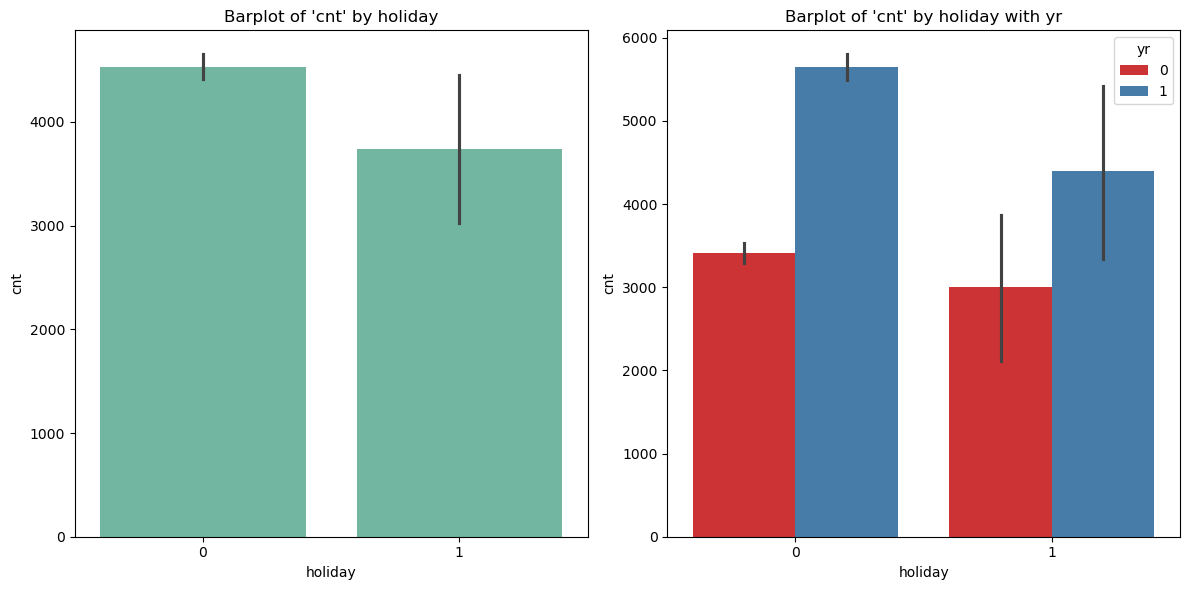

In [49]:
# plotting visualization for holiday column

plot_cat_columns('holiday', hue='yr')

- bookings were almost or same range on Weekend and Work days in 2018, but increased in 2019.

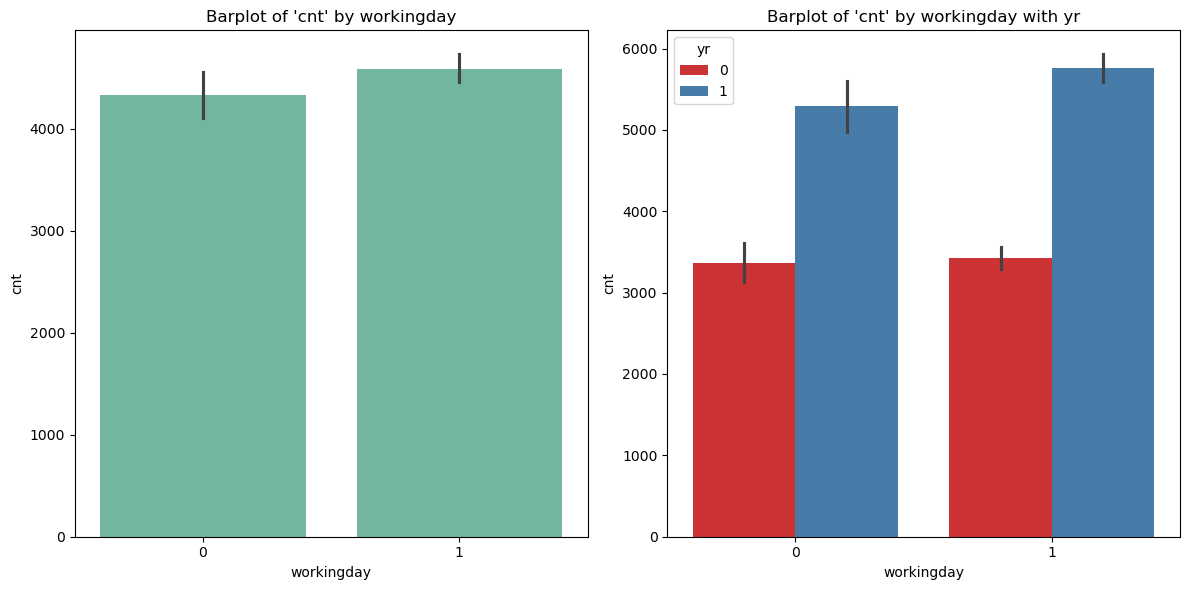

In [51]:
# plotting visualization for workingday column

plot_cat_columns('workingday', hue='yr')

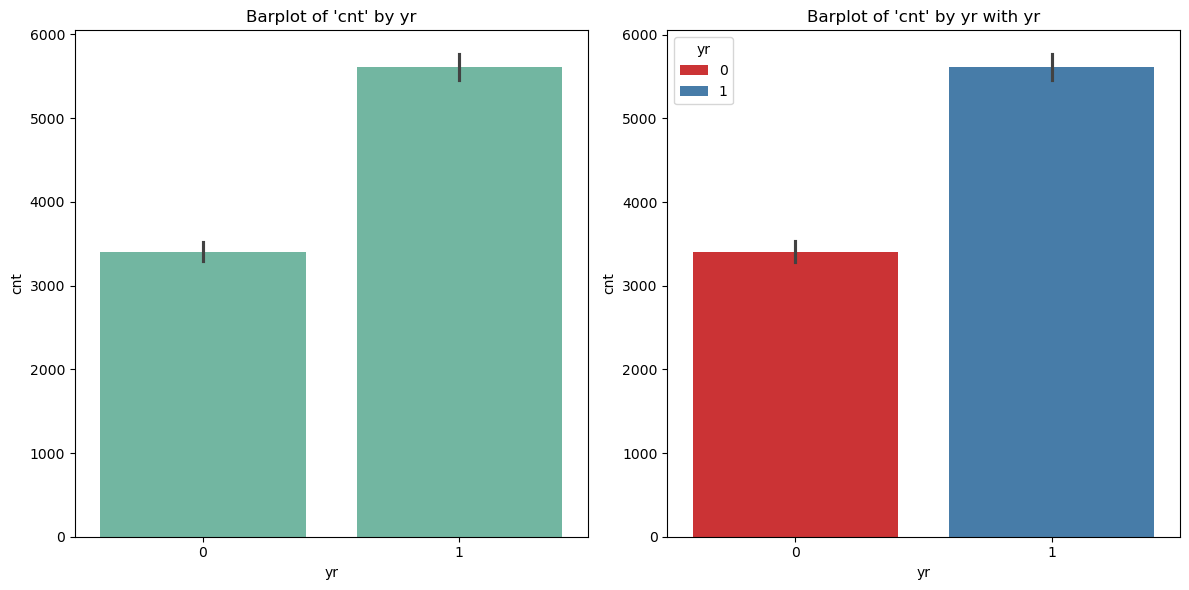

In [53]:
# plotting visualization for yr column

plot_cat_columns('yr', hue='yr')

- Bike rentals are more in the year 2019 compared to 2018

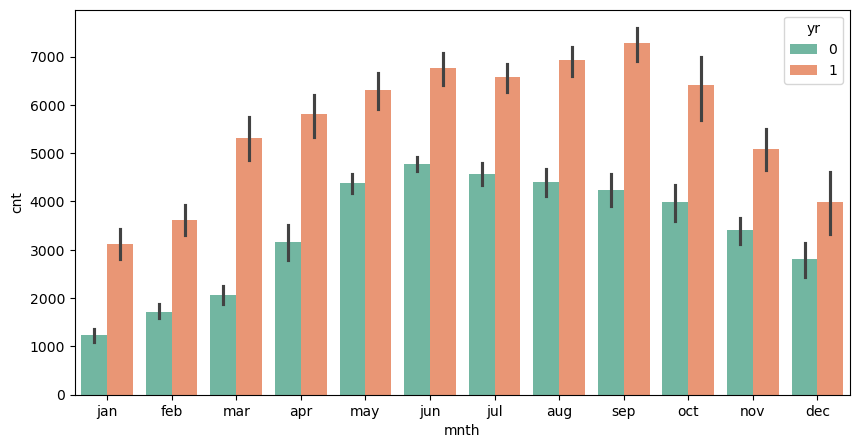

In [297]:
# Plotting visualization between month 

plt.figure(figsize=(10,5))
sns.barplot(x = 'mnth', y = 'cnt',hue='yr', data = df)
plt.show()

- Higher bike rentals during the warmer months (May to October) and lower rentals during the colder months (November to April)
- Number of booking for each month seems to have increased from 2018 to 2019

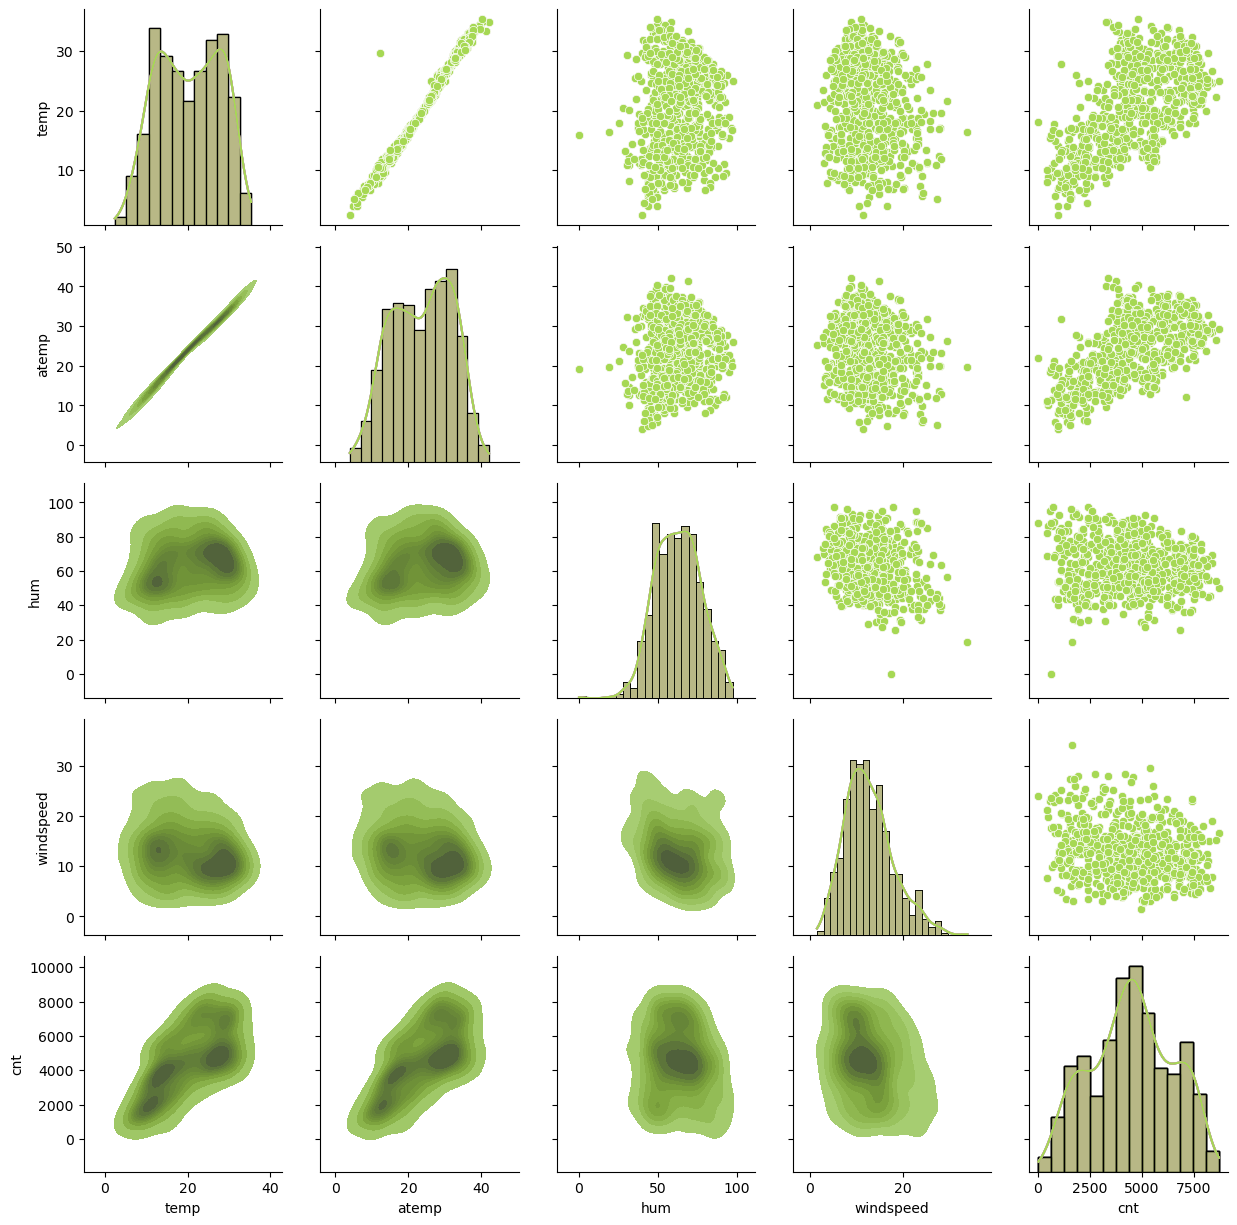

In [304]:
# Analysing/visualizing the numerical columns

# Define the dataset and variables to analyze
vars_to_plot = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Create a custom PairGrid
g = sns.PairGrid(data=df, vars=vars_to_plot)

# Define a palette with a distinct color for each plot
colors = sns.color_palette("Set2", len(vars_to_plot))

# Map different scatter plots to each pair
for i, color in enumerate(colors):
    g.map_upper(sns.scatterplot, color=color)  # Upper triangle with scatterplots
    g.map_lower(sns.kdeplot, color=color, fill=True)  # Lower triangle with KDE plots
    g.map_diag(sns.histplot, color=color, kde=True)  # Diagonal with histograms

plt.show()

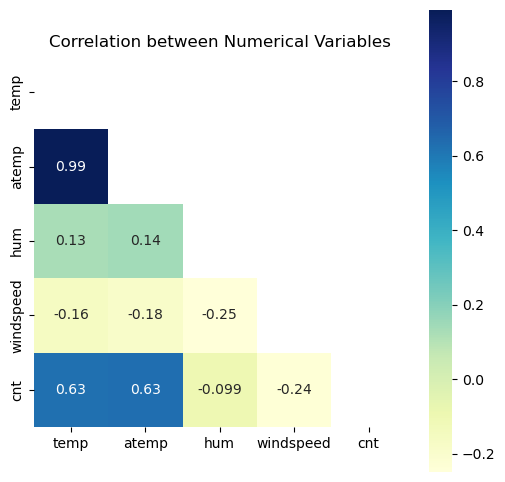

In [306]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="YlGnBu", mask=matrix, square = True)
plt.title("Correlation between Numerical Variables")
plt.show()

- There is linear relationship between temp and atemp. It shows multicolinearity. 


##
## Feature engineering

#### Dummy variables

In [60]:
# Dummy variable creation for mnth, weekday, weathersit and season variables - using get_dummies function.

mnths_df=pd.get_dummies(df.mnth,drop_first=True).astype(int)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True).astype(int)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True).astype(int)
seasons_df=pd.get_dummies(df.season,drop_first=True).astype(int)

In [61]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [62]:
mnths_df.head()


,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [63]:
df_new = pd.concat([df, mnths_df, weekdays_df, weathersit_df, seasons_df], axis=1)

In [64]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thurs,tues,wed,Light_SnowRain_Thunderstorm,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tues,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [65]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   season                       730 non-null    object 
 1   yr                           730 non-null    int64  
 2   mnth                         730 non-null    object 
 3   holiday                      730 non-null    int64  
 4   weekday                      730 non-null    object 
 5   workingday                   730 non-null    int64  
 6   weathersit                   730 non-null    object 
 7   temp                         730 non-null    float64
 8   atemp                        730 non-null    float64
 9   hum                          730 non-null    float64
 10  windspeed                    730 non-null    float64
 11  cnt                          730 non-null    int64  
 12  aug                          730 non-null    int32  
 13  dec                 

In [66]:
df_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thurs,tues,wed,Light_SnowRain_Thunderstorm,Misty,spring,summer,winter
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.084932,0.084932,...,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986,0.246575,0.252055,0.243836
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.278971,0.278971,...,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [68]:
# check the head of new dataframe

df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thurs,tues,wed,Light_SnowRain_Thunderstorm,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [69]:
df_new.shape

(730, 30)

In [70]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   yr                           730 non-null    int64  
 1   holiday                      730 non-null    int64  
 2   workingday                   730 non-null    int64  
 3   temp                         730 non-null    float64
 4   atemp                        730 non-null    float64
 5   hum                          730 non-null    float64
 6   windspeed                    730 non-null    float64
 7   cnt                          730 non-null    int64  
 8   aug                          730 non-null    int32  
 9   dec                          730 non-null    int32  
 10  feb                          730 non-null    int32  
 11  jan                          730 non-null    int32  
 12  jul                          730 non-null    int32  
 13  jun                 

- Temperature,Summer season,June to october months are in good correlation with the 'cnt'
- Seem to have good influence on the number of bike rentals.

##
## Split the data


##
#### Split the dataset into training and testing sets

In [72]:
# splitting the dataframe into Train (70%) and Test (30%) dataset

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [73]:
# check the shape of training datatset
df_train.shape

(510, 30)

In [74]:
# check the shape of testing datatset
df_test.shape

(220, 30)

#
#### Rescaling the features

In [75]:
# using MinMaxScalar to Rescaling the features
scaler = MinMaxScaler()

In [76]:
# verifying the dataset before scaling.
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thurs,tues,wed,Light_SnowRain_Thunderstorm,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [77]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [78]:
# verifying the head after appying scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thurs,tues,wed,Light_SnowRain_Thunderstorm,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [79]:
# describing the dataset

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thurs,tues,wed,Light_SnowRain_Thunderstorm,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
df_train.corr(method='pearson',numeric_only=True)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thurs,tues,wed,Light_SnowRain_Thunderstorm,Misty,spring,summer,winter
yr,1.000000,-0.014980,0.031808,0.108054,0.104971,-0.084061,-0.000439,0.591433,0.054774,-0.040049,...,-0.033817,-0.000812,-6.153420e-03,-0.000296,-0.001452,-6.076399e-02,-0.011388,-0.036320,0.018294,-0.027174
holiday,-0.014980,1.000000,-0.233863,-0.066405,-0.070760,-0.029224,0.017458,-0.095948,-0.052728,-0.004302,...,-0.069242,-0.066102,9.759407e-03,-0.062897,-0.070276,-2.815377e-02,-0.038895,0.053339,-0.063798,0.051582
workingday,0.031808,-0.233863,1.000000,0.068326,0.068349,0.032525,-0.042704,0.092019,0.040575,-0.031500,...,-0.619074,-0.591001,2.465943e-01,0.268948,0.300501,2.115873e-02,0.043563,-0.037932,0.046302,-0.060593
temp,0.108054,-0.066405,0.068326,1.000000,0.989539,0.155252,-0.187281,0.645048,0.387176,-0.273091,...,-0.042608,-0.017367,2.518482e-03,0.048662,0.029020,-3.622709e-02,-0.089452,-0.606396,0.126057,-0.234200
atemp,0.104971,-0.070760,0.068349,0.989539,1.000000,0.169341,-0.215108,0.647944,0.359727,-0.262072,...,-0.043785,-0.014223,6.021767e-03,0.051493,0.027554,-4.439780e-02,-0.085086,-0.611118,0.136550,-0.211852
hum,-0.084061,-0.029224,0.032525,0.155252,0.169341,1.000000,-0.267126,-0.058793,0.052949,0.057615,...,-0.040858,0.011915,-3.853025e-02,0.012087,0.046866,2.449653e-01,0.479436,-0.201616,-0.014192,0.173980
windspeed,-0.000439,0.017458,-0.042704,-0.187281,-0.215108,-0.267126,1.000000,-0.253038,-0.111460,-0.061179,...,0.049063,-0.001499,-4.619727e-03,-0.004101,-0.019862,8.677832e-02,-0.029892,0.180351,0.110441,-0.090740
cnt,0.591433,-0.095948,0.092019,0.645048,0.647944,-0.058793,-0.253038,1.000000,0.227578,-0.143546,...,-0.015998,-0.063214,9.927716e-03,0.030528,0.025468,-2.266784e-01,-0.169715,-0.548987,0.140259,0.025945
aug,0.054774,-0.052728,0.040575,0.387176,0.359727,0.052949,-0.111460,0.227578,1.000000,-0.098929,...,0.007536,-0.038258,9.134039e-03,0.011084,0.003962,-5.675323e-02,0.015258,-0.184784,-0.186753,-0.186753
dec,-0.040049,-0.004302,-0.031500,-0.273091,-0.262072,0.057615,-0.061179,-0.143546,-0.098929,1.000000,...,0.045624,-0.003121,2.629507e-02,-0.055338,-0.035320,-1.105587e-02,0.017231,0.041868,-0.173818,0.317031


##### All the numeric variables are now mapped between 0 and 1

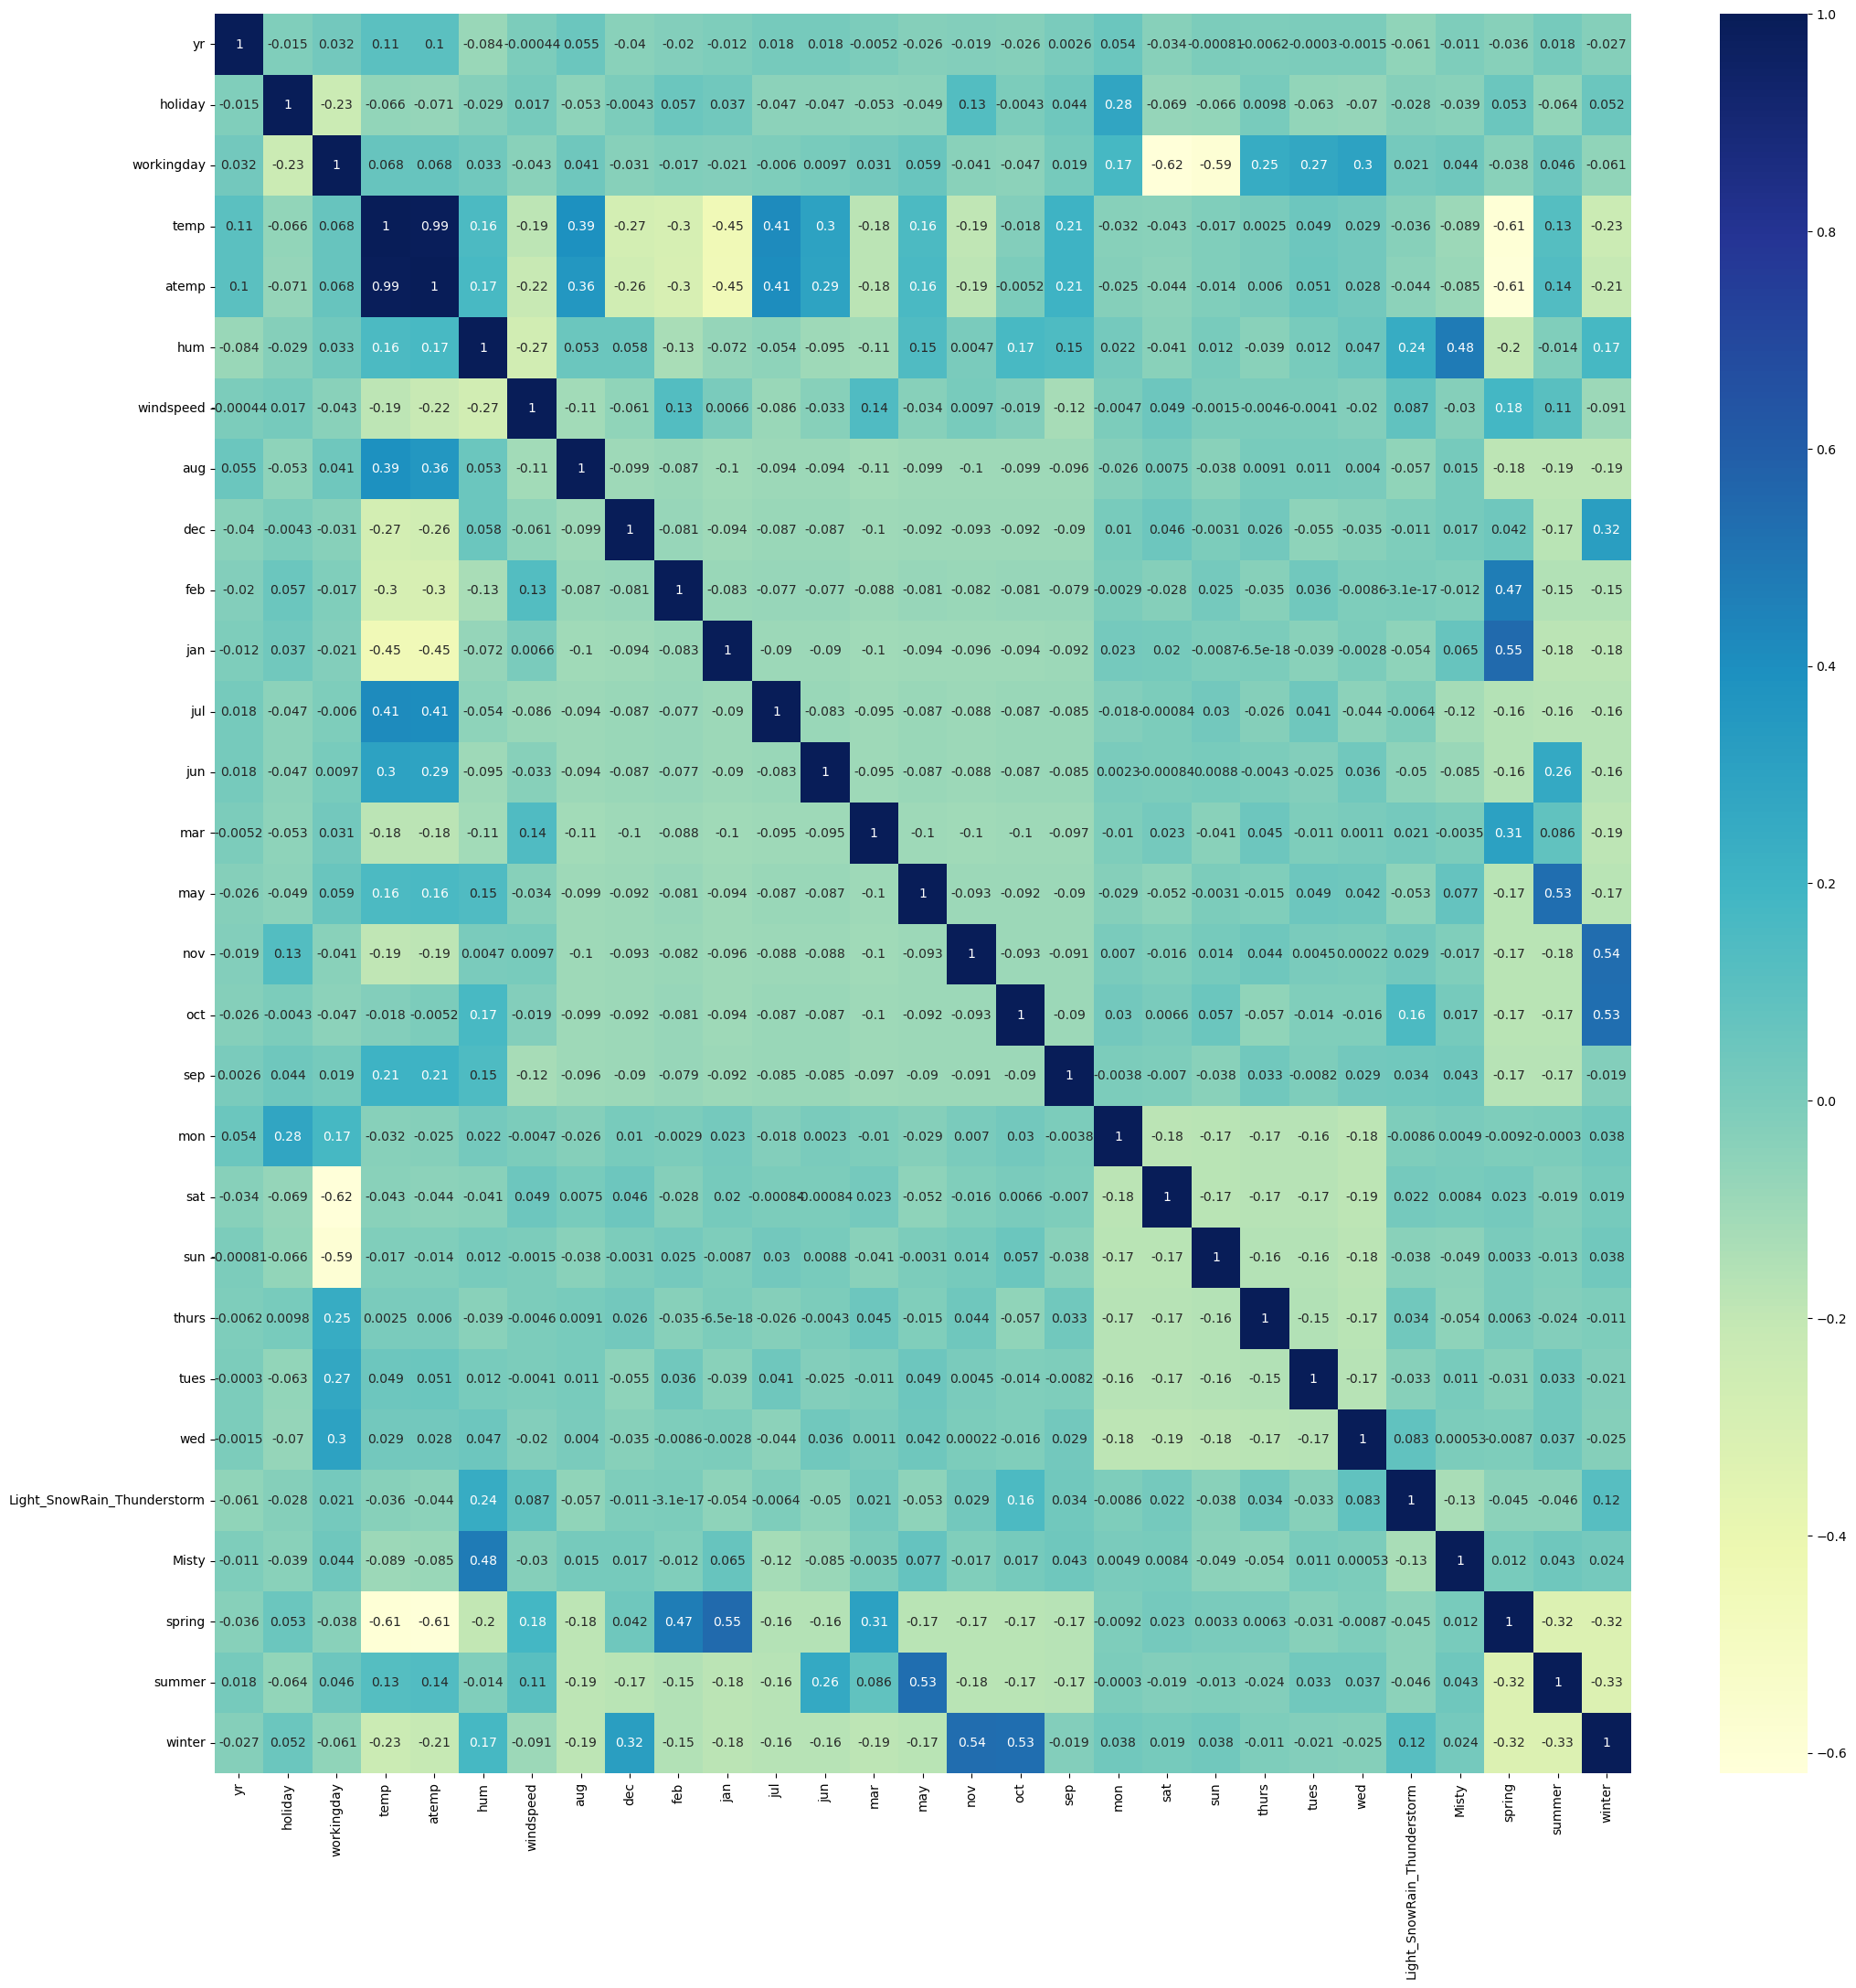

In [324]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr(method='pearson',numeric_only=True))
# print(matrix)
sns.heatmap(df_train.corr(method='pearson',numeric_only=True), annot = True, cmap="YlGnBu")
plt.show()

### Observation :
- count seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.may month and Winter season with oct and nov month show good correlation.

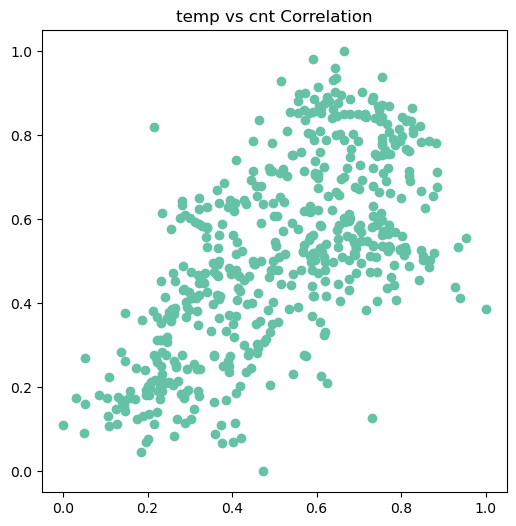

In [83]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.title("temp vs cnt Correlation")
plt.show()

#### above scatter plot visualization indicates the positive correlation between temp and cnt variables.

#
# Model training:

#### Make predictions ( Create and train liner model)

In [85]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [86]:
#df_new.workingday = df_new.workingday.map({'Work Day':1, 'Weekend/Holiday':0}).astype(float)

In [87]:
#df_new.workingday.unique()

In [88]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)


rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [89]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False,  True,  True,  True,
        True,  True])

In [90]:
rfe.ranking_

array([ 1,  1,  1,  1,  6,  1,  1,  8,  4,  5,  2,  1, 15, 16,  7,  3, 14,
        1, 10,  1,  9, 12, 11, 13,  1,  1,  1,  1,  1])

In [91]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'mon', 'sat', 'sun', 'thurs', 'tues', 'wed',
       'Light_SnowRain_Thunderstorm', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [92]:
# Ensure RFE is fitted before using this
feature_info = [
    (str(feature), bool(selected), int(rank))
    for feature, selected, rank in zip(X_train.columns, rfe.support_, rfe.ranking_)
]

feature_info



[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('jul', True, 1),
 ('jun', False, 15),
 ('mar', False, 16),
 ('may', False, 7),
 ('nov', False, 3),
 ('oct', False, 14),
 ('sep', True, 1),
 ('mon', False, 10),
 ('sat', True, 1),
 ('sun', False, 9),
 ('thurs', False, 12),
 ('tues', False, 11),
 ('wed', False, 13),
 ('Light_SnowRain_Thunderstorm', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [93]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jul', 'sep',
       'sat', 'Light_SnowRain_Thunderstorm', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [94]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'nov', 'oct',
       'mon', 'sun', 'thurs', 'tues', 'wed'],
      dtype='object')

In [95]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [96]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [97]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
11,spring,4.24
13,winter,3.42
12,summer,2.85
10,Misty,2.29
0,yr,2.08
8,sat,1.97


### MODEL - 1

In [100]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [101]:
# Adding a constant variable to the x train dataset
X_train_sm = sm.add_constant(X_train_rfe)

In [102]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sat,sun,thurs,tues,wed,Light_SnowRain_Thunderstorm,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [103]:
# Running the linear model by providing y and x train dataset
lm = sm.OLS(y_train, X_train_sm).fit()

# checking the parameters of lm
lm.params

const                          0.240163
yr                             0.229763
holiday                       -0.059083
workingday                     0.043033
temp                           0.527708
hum                           -0.161086
windspeed                     -0.180875
jul                           -0.054616
sep                            0.081983
sat                            0.053031
Light_SnowRain_Thunderstorm   -0.245009
Misty                         -0.056344
spring                        -0.055546
summer                         0.053733
winter                         0.099214
dtype: float64

In [104]:
# Checking the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.11e-191
Time:                        18:30:40   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

##### Summary
- R-squared is high and good for prediction
- 
p-value close to 0 is good for predictio
- F-statistic is high
- Prob (F-statistic) is equvalent to 0 is good

### Checking VIF

##### Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other.

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
11,spring,4.24
13,winter,3.42
12,summer,2.85
10,Misty,2.29
0,yr,2.08
8,sat,1.97


#### Drop criteria:

> ##### High p-value and high VIF

> ##### High-low :
       >   i)  High P, Low VIF - Drop this first<br>
       >   ii) Low P-Value, High VIF - Drop this after above<br>

> ##### Low p and low VIF

In [112]:
# Drop holiday as it has high p-value
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [113]:
# Check the columns list after dropping holiday
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'jul', 'sep', 'sat',
       'Light_SnowRain_Thunderstorm', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

## MODEL - 2
Let's repeat the process after removing a variable and check the p-value and VIF again

Observation :
-   VIF value is significantly decreased after removing workingday

In [116]:
# Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.11e-191
Time:                        18:30:41   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [117]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

In [118]:
# Running the linear model
lm2 = sm.OLS(y_train, X_train_lm2).fit()

lm2.params

const                          0.230660
yr                             0.229985
workingday                     0.051820
temp                           0.527801
hum                           -0.159435
windspeed                     -0.181454
jul                           -0.053474
sep                            0.079917
sat                            0.061937
Light_SnowRain_Thunderstorm   -0.244219
Misty                         -0.056078
spring                        -0.056614
summer                         0.054071
winter                         0.098254
dtype: float64

In [119]:
# Let's see the summary of our linear model2
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.54e-191
Time:                        18:30:42   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Observation :

-   R-squared high and good for prediction
-   F-statistic is high
-   Prob (F-statistic) is ~0 is good
-   p-value is gignificantly increased for `weekday_Saturday`

In [121]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.38
2,temp,16.88
1,workingday,4.72
4,windspeed,4.70
10,spring,4.18
12,winter,3.39
11,summer,2.84
9,Misty,2.28
0,yr,2.08
7,sat,1.84


##
## MODEL - 3

Let's repeat the process after removing a variable and check the p-value and VIF again


In [123]:
# Drop weekday sat
X_train_new = X_train_new.drop(["sat"], axis = 1)

# Let's check the column list after dropping weekday sat
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'jul', 'sep',
       'Light_SnowRain_Thunderstorm', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [124]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.27
2,temp,16.41
4,windspeed,4.65
9,spring,4.06
11,winter,3.34
1,workingday,3.04
10,summer,2.81
8,Misty,2.28
0,yr,2.08
5,jul,1.58


In [125]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

In [126]:
# Running the linear model
lm3 = sm.OLS(y_train, X_train_lm3).fit()

In [127]:
# Checking the parameter of the model lm3
lm3.params

const                          0.267524
yr                             0.229175
workingday                     0.021950
temp                           0.528806
hum                           -0.171803
windspeed                     -0.181188
jul                           -0.054516
sep                            0.080118
Light_SnowRain_Thunderstorm   -0.235539
Misty                         -0.052166
spring                        -0.057854
summer                         0.053503
winter                         0.096906
dtype: float64

In [128]:
# Let's see the summary of our linear model3
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.5
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.43e-188
Time:                        18:30:42   Log-Likelihood:                 505.30
No. Observations:                 510   AIC:                            -984.6
Df Residuals:                     497   BIC:                            -929.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

##
## MODEL - 4
##


In [130]:
# Checking the columns in the training dataset
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'jul', 'sep',
       'Light_SnowRain_Thunderstorm', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [131]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.27
2,temp,16.41
4,windspeed,4.65
9,spring,4.06
11,winter,3.34
1,workingday,3.04
10,summer,2.81
8,Misty,2.28
0,yr,2.08
5,jul,1.58


In [132]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Running the linear model
lm4 = sm.OLS(y_train, X_train_lm4).fit()

# Checking the parameter of lm4
lm4.params

const                          0.267524
yr                             0.229175
workingday                     0.021950
temp                           0.528806
hum                           -0.171803
windspeed                     -0.181188
jul                           -0.054516
sep                            0.080118
Light_SnowRain_Thunderstorm   -0.235539
Misty                         -0.052166
spring                        -0.057854
summer                         0.053503
winter                         0.096906
dtype: float64

In [133]:
# Let's see the summary of our linear model4

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.5
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.43e-188
Time:                        18:30:43   Log-Likelihood:                 505.30
No. Observations:                 510   AIC:                            -984.6
Df Residuals:                     497   BIC:                            -929.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

##
## MODEL - 5

Now we will drop high VIF variables as we are done with high p-value

In [135]:
# Drop hum as it has high VIF
X_train_new = X_train_new.drop(["hum"], axis = 1)

# Let's check the column value after dropping 
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'jul', 'sep',
       'Light_SnowRain_Thunderstorm', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [136]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.95
3,windspeed,4.60
1,workingday,3.02
9,summer,2.27
8,spring,2.20
0,yr,2.07
10,winter,1.82
4,jul,1.58
7,Misty,1.56
5,sep,1.33


In [137]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Running the linear model
lm5 = sm.OLS(y_train, X_train_lm5).fit()

lm5.params

const                          0.182169
yr                             0.233355
workingday                     0.022563
temp                           0.490064
windspeed                     -0.147013
jul                           -0.049299
sep                            0.073731
Light_SnowRain_Thunderstorm   -0.282647
Misty                         -0.079574
spring                        -0.068590
summer                         0.046946
winter                         0.081148
dtype: float64

In [138]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.92e-185
Time:                        18:30:43   Log-Likelihood:                 495.06
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     498   BIC:                            -915.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Now we have all the p-values less than 0.05 and VIF is less then 5. So, we can stop model re-building process.

##
## Step: 8 - Residual Analysis of the train data

Checking if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [141]:
# Calculating y predicted dataset from final model
y_train_pred = lm5.predict(X_train_lm5)

In [142]:
# Calculating error terms
residuals = y_train - y_train_pred

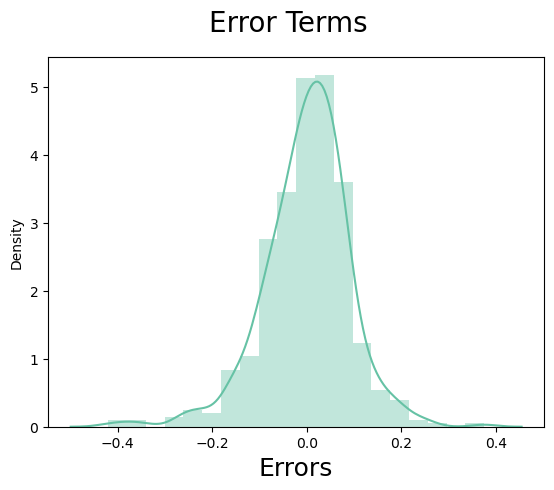

In [143]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

Inference:
-   Error terms are normally distributed.

#### Verifying the Residuals using QQ Plot


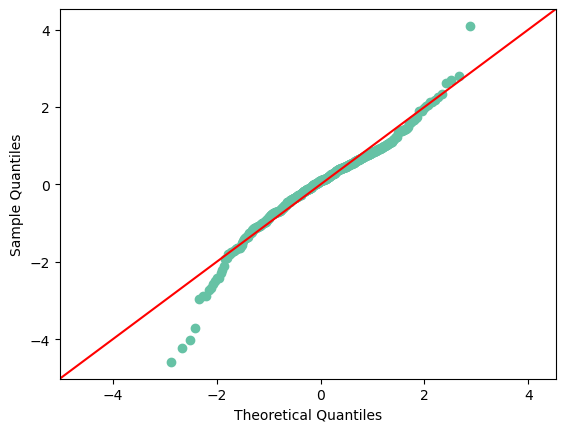

In [146]:
# Verifying same using QQ Plot
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

#### Error term VS Predicted Values

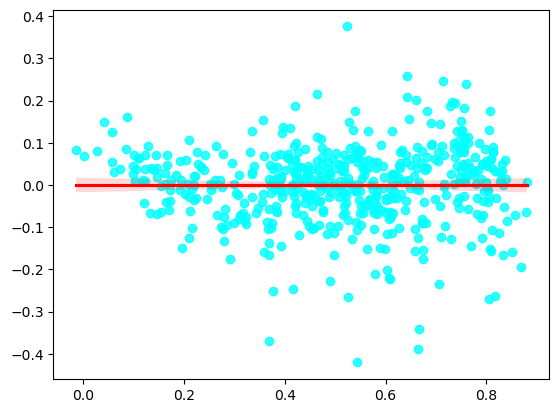

In [283]:
# Plotting the regplot for train_pred vs residuals
sns.regplot(x=y_train_pred, y=residuals, scatter_kws={
            "color": "cyan"}, line_kws={"color": "red"})
plt.show()


## Step: 9 Making Predictions using the Final Model

#### Applying the scaling on the test sets

In [150]:
# Creating numeric variable list
num_vars = ['temp','atemp', 'hum', 'windspeed', 'cnt']

# Apply the scalling
df_test[num_vars] = scaler.transform(df_test[num_vars])

# Checking the test set after scalling
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thurs,tues,wed,Light_SnowRain_Thunderstorm,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


#### Dividing into X_test and y_test

In [152]:
# Crealting X and y test dataset from df_test dataset
y_test = df_test.pop('cnt')
X_test = df_test

### Creating X and y test dataset from df_test dataset


In [154]:
# Now let us use our model to make predictions.

# Creating X_test_new dataframe by dropping the insignificant variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_lm = sm.add_constant(X_test_new)

In [155]:
# Making predictions
y_pred = lm5.predict(X_test_lm)

In [156]:
# let's see the predicted values
y_pred

184    0.448542
535    0.904155
299    0.408069
221    0.586864
152    0.573174
         ...   
702    0.732030
127    0.505412
640    0.797391
72     0.268721
653    0.724892
Length: 220, dtype: float64

#
## Model Evaluation


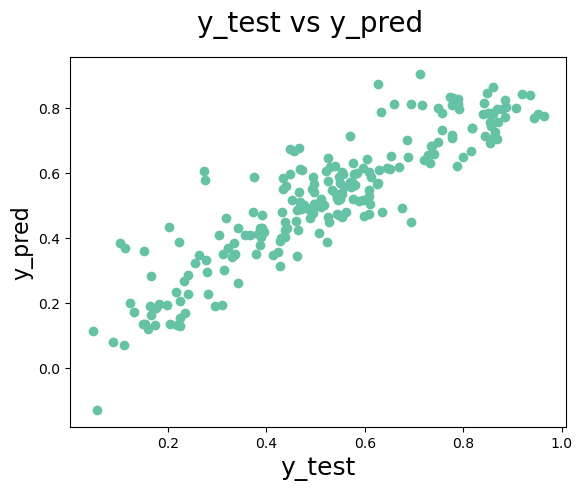

In [158]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # y-label
plt.show()    

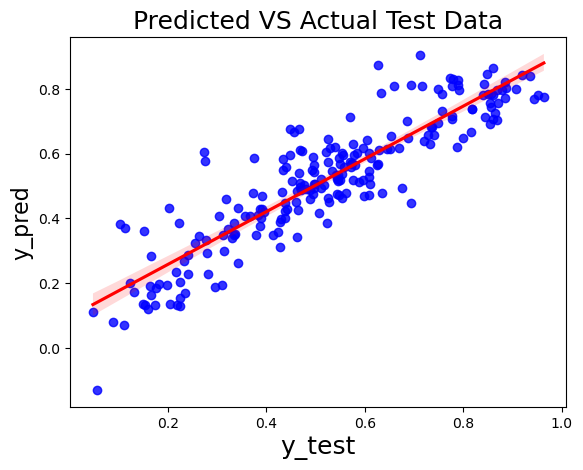

In [159]:
# Plotting y_test and y_pred using sns 
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.title('Predicted VS Actual Test Data', fontdict={'fontsize': 18}) # Heading
plt.show()

#### R-squared score on the test set.

In [161]:
# Caculate the r-squared 
r2_test = r2_score(y_test, y_pred)
r2_test

0.8054382919323708

#### Adjusted R Squaired on test set

In [163]:
# Caculate the adjusted r-squared 
adj_r2 = round(
    1-(1-r2_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1), 3)
print(adj_r2)


0.776


# Model interpretation

#### Equation for best fit line :

In [165]:
# Coefficent for the variables
round(lm5.params, 3)

const                          0.182
yr                             0.233
workingday                     0.023
temp                           0.490
windspeed                     -0.147
jul                           -0.049
sep                            0.074
Light_SnowRain_Thunderstorm   -0.283
Misty                         -0.080
spring                        -0.069
summer                         0.047
winter                         0.081
dtype: float64

## <font color='blue'> Final Insights and Recommendations for the Company: </font>
## ➤ <font  color='Dark Green'> Key Insights: </font>
- Seasonal Trends:
Demand peaks during the Fall season, while the Spring season experiences the lowest demand for bikes..
- Weather Situation:
The highest demand occurs in clear weather with "Clear, Few Clouds," whereas "Light Snow, Light Rain" conditions see the least demand.
- Year:
The year 2018 observed lower demand, whereas 2019 experienced a significant rise in demand.
- Month:
September has the highest demand, followed by October, August, and June.
January registers the lowest demand.
- Holiday:
There is notably higher demand on holidays compared to non-holidays.
- Weekday:
Demand does not show significant variation across weekdays.
## ➤ <font color='YlGnBu_r'> Recommendations: </font>
- Monitor Weather Conditions:
- Since demand increases with favorable weather and higher temperatures, the company should optimize operations based on weather forecasts.
Leverage Annual Growth Trends:
- With an uptrend in annual demand, the company should focus on long-term strategies to ensure scalability and customer satisfaction.
Prepare for Seasonal Peaks:
- The company should allocate additional resources for September, October, and August, as these months show peak demand.
Winter Readiness:
- As demand surges during the Winter Season, it is crucial to ensure adequate bike availability and maintenance to meet the high demand effectively.
By strategically aligning operations with demand patterns, the company can maximize revenue and enhance customer satisfaction.